In [1]:
%pylab inline
from gp import GaussianProcess
from gp.kernel import RBF
import seaborn as sns
sns.set_style('white')

Populating the interactive namespace from numpy and matplotlib


/home/sharad/workspace/hack/gp/venv/local/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [247]:
kernel = RBF(2.0)
gp = GaussianProcess(kernel, noise=0.1).compile()

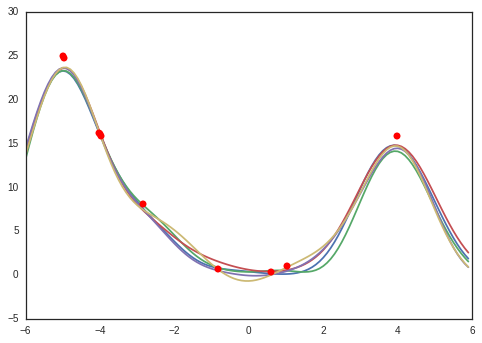

In [253]:
def f(x):
    return x**2

n_train = 10
Xtrain = np.sort(np.random.uniform(-6, 6, size=n_train))
ytrain = f(Xtrain)

gp.reset()
gp.observe(Xtrain[:, np.newaxis], ytrain)
X = np.arange(-6, 6, 0.1)
samples = gp.sample(X[:, np.newaxis], size=5)
for i in xrange(samples.shape[0]):
    plot(X, samples[i])
plot(gp.Xtrain.get_value().T[0], ytrain, 'or')

7


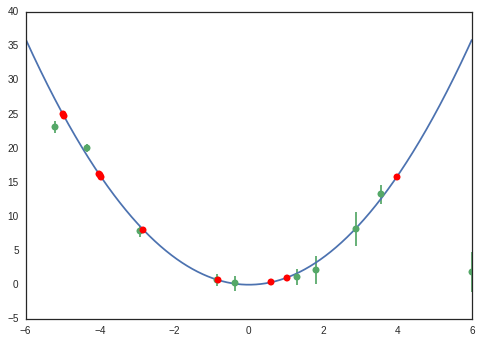

In [254]:
n_test = 10
width = 3
Xtest = np.sort(np.random.uniform(-6, 6, size=n_test))
means, vars = gp.predict(Xtest[:, np.newaxis])
upper = means + width * np.sqrt(vars)
lower = means - width * np.sqrt(vars)
in_interval = np.logical_and(lower < f(Xtest), f(Xtest) < upper)
plt.plot(np.arange(-6, 6, 0.01), f(np.arange(-6, 6, 0.01)))
plt.errorbar(Xtest, means, yerr=width * np.sqrt(vars), fmt='o')
plot(gp.Xtrain.get_value().T[0], ytrain, 'or')
print in_interval.sum()